# Desafio - Pandas: limpeza e tratamento de dados

Ao normalizar o objeto JSON durante a aula passamos simplesmente pd.json_normalize(<dados>) mas o método json_normalize possui diversos parâmetros para trabalhar com estruturas de dados mais complexas.

Você recebeu a tarefa de normalizar o seguinte [arquivo JSON chamado “informacoes.json”](https://caelum-online-public.s3.amazonaws.com/2929-pandas/informacoes.json) referente a algumas informações de identificação de um cliente. O arquivo possui o seguinte conteúdo:

```
{
  "nome": "João",
  "idade": 28,
  "enderecos": [
    {
      "tipo": "casa",
      "rua": "Rua A",
      "numero": 123,
      "cidade": "São Paulo"
    },
    {
      "tipo": "trabalho",
      "rua": "Rua B",
      "numero": 456,
      "cidade": "Rio de Janeiro"
    }
  ]
}
```
O resultado final deve ser um Pandas DataFrame que possui a seguinte estrutura:

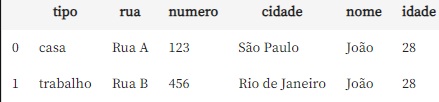

Como podemos fazer isso?

In [20]:
import pandas as pd
import json

In [21]:
with open('informacoes.json') as f:
  dados = json.load(f)
dados

{'nome': 'João',
 'idade': 28,
 'enderecos': [{'tipo': 'casa',
   'rua': 'Rua A',
   'numero': 123,
   'cidade': 'São Paulo'},
  {'tipo': 'trabalho',
   'rua': 'Rua B',
   'numero': 456,
   'cidade': 'Rio de Janeiro'}]}

In [22]:
dados_normalizados = pd.json_normalize(dados, record_path='enderecos', meta= ['nome', 'idade'])
dados_normalizados

,tipo,rua,numero,cidade,nome,idade
0,casa,Rua A,123,São Paulo,João,28
1,trabalho,Rua B,456,Rio de Janeiro,João,28


# Desafio: tratando os dados

Você recebeu e fez o download o [arquivo JSON](https://caelum-online-public.s3.amazonaws.com/2929-pandas/dados.json) chamado “dados.json” que possui o seguinte conteúdo:

```
{
  "pessoas": [
    {
      "nome": "João",
      "idade": "25",
      "endereco": {
        "rua": "Rua A",
        "numero": 123,
        "cidade": "São Paulo"
      },
      "telefones": [
        "11 1111-1111",
        "11 2222-2222"
      ]
    },
    {
      "nome": "Maria",
      "idade": 30,
      "endereco": {
        "rua": "",
        "numero": 456,
        "cidade": "Rio de Janeiro"
      },
      "telefones": [
        "21 3333-3333"
      ]
    }
  ]
}
```
Sua tarefa é realizar alguns tratamentos e deixar esse arquivo JSON como um Pandas DataFrame, sem dados vazios e com a tipagem das colunas de forma correta.

Como isso pode ser feito?


In [23]:
import pandas as pd
import json

In [24]:
url = 'https://caelum-online-public.s3.amazonaws.com/2929-pandas/dados.json'

In [25]:
with open('dados.json') as f:
  dados = json.load(f)
dados

{'pessoas': [{'nome': 'João',
   'idade': '25',
   'endereco': {'rua': 'Rua A', 'numero': 123, 'cidade': 'São Paulo'},
   'telefones': ['11 1111-1111', '11 2222-2222']},
  {'nome': 'Maria',
   'idade': 30,
   'endereco': {'rua': '', 'numero': 456, 'cidade': 'Rio de Janeiro'},
   'telefones': ['21 3333-3333']}]}

In [26]:
dados = pd.json_normalize(dados, record_path=['pessoas'])

In [27]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   nome             2 non-null      object
 1   idade            2 non-null      object
 2   telefones        2 non-null      object
 3   endereco.rua     2 non-null      object
 4   endereco.numero  2 non-null      int64 
 5   endereco.cidade  2 non-null      object
dtypes: int64(1), object(5)
memory usage: 224.0+ bytes


In [28]:
dados['idade'] = dados['idade'].astype(int)

In [29]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   nome             2 non-null      object
 1   idade            2 non-null      int64 
 2   telefones        2 non-null      object
 3   endereco.rua     2 non-null      object
 4   endereco.numero  2 non-null      int64 
 5   endereco.cidade  2 non-null      object
dtypes: int64(2), object(4)
memory usage: 224.0+ bytes


In [30]:
dados = dados[dados['endereco.rua']!='']

In [31]:
dados

,nome,idade,telefones,endereco.rua,endereco.numero,endereco.cidade
0,João,25,"[11 1111-1111, 11 2222-2222]",Rua A,123,São Paulo


#Desafio: tratando uma base de dados

Para facilitar a análise dos dados de cadastro de cursos de uma plataforma, você recebeu um arquivo chamado [cursos_cadastrados.json](https://caelum-online-public.s3.amazonaws.com/2929-pandas/cursos_cadastrados.json). Você foi informado que esses dados podem apresentar problemas que podem prejudicar a análise e interpretação correta dos dados.

Para resolver isso, foi solicitado que você identifique e remova as amostras que apresentam os seguintes problemas:

* Valores nulos: são valores ausentes em algumas das colunas que devem ser preenchidos para que a análise seja correta.
* Duplicatas: registros iguais que podem prejudicar a análise dos dados, já que estão representando a mesma informação.
* Strings vazias: valores de texto que não apresentam nenhum conteúdo escrito, o que pode dificultar a análise de dados, principalmente se a coluna tiver muitos valores assim.
* Conversão de tipos: algumas colunas do arquivo podem estar no tipo de dados errado, como texto em vez de número, o que pode prejudicar a análise. Nesse caso você deve realizar a conversão para o tipo correto de cada coluna.
* Dentro desse contexto, você precisará de uma abordagem sistemática para limpar os dados. Assim, como isso pode ser feito?

Lembrando que o conteúdo de cursos_cadastrados.json é:

```
[
    {
        "curso": "Introdução à programação",
        "categoria": "Programação",
        "carga_horaria": "20 horas",
        "concluintes": 100,
        "data_inicio": "2022-01-01",
        "data_conclusao": "2022-01-20",
        "descricao": "Curso introdutório à programação com Python",
        "preco": "99.90",
        "instrutor": {
            "nome": "João Silva",
            "email": "joao.silva@emailaleatorio.com",
            "telefone": "(11) 9999-9999"
        }
    },
    {
        "curso": "Excel para iniciantes",
        "categoria": "Produtividade",
        "carga_horaria": null,
        "concluintes": null,
        "data_inicio": null,
        "data_conclusao": null,
        "descricao": null,
        "preco": null,
        "instrutor": {
            "nome": "Maria Oliveira",
            "email": "maria.oliveira@emailaleatorio.com",
            "telefone": "(11) 8888-8888"
        }
    },
    {
        "curso": "Marketing digital para negócios",
        "categoria": "Marketing",
        "carga_horaria": "30 horas",
        "concluintes": 75,
        "data_inicio": "2022-03-01",
        "data_conclusao": "2022-03-31",
        "descricao": "Curso introdutório em marketing",
        "preco": 89.90,
        "instrutor": {
            "nome": "Ana Santos",
            "email": "ana.santos@emailaleatorio.com",
            "telefone": "(11) 7777-7777"
        }
    },
    {
        "curso": "Inteligência artificial",
        "categoria": "Programação",
        "carga_horaria": "40 horas",
        "concluintes": "",
        "data_inicio": "2022-04-01",
        "data_conclusao": "",
        "descricao": "Curso avançado sobre inteligência artificial com Python",
        "preco": 129.90,
        "instrutor": {
            "nome": "",
            "email": "contato@emailaleatorio.com",
            "telefone": ""
        }
    },
    {
        "curso": "Inglês para negócios",
        "categoria": "Idiomas",
        "carga_horaria": "20 horas",
        "concluintes": 30,
        "data_inicio": "",
        "data_conclusao": "",
        "descricao": "Curso de inglês para negócios",
        "preco": 69.90,
        "instrutor": {
            "nome": "John Smith",
            "email": "",
            "telefone": ""
        }
    },
    {
        "curso": "Introdução à programação",
        "categoria": "Programação",
        "carga_horaria": "20 horas",
        "concluintes": 100,
        "data_inicio": "2022-01-01",
        "data_conclusao": "2022-01-20",
        "descricao": "Curso introdutório à programação com Python",
        "preco": "99.90",
        "instrutor": {
            "nome": "João Silva",
            "email": "joao.silva@emailaleatorio.com",
            "telefone": "(11) 9999-9999"
        }
    }
]

```




In [32]:
import pandas as pd
import json
import urllib.request

In [33]:
url = 'https://caelum-online-public.s3.amazonaws.com/2929-pandas/cursos_cadastrados.json'

In [34]:
arquivo = urllib.request.urlopen(url)
cursos_cadastrados = json.load(arquivo)
cursos_cadastrados

[{'curso': 'Introdução à programação',
  'categoria': 'Programação',
  'carga_horaria': '20 horas',
  'concluintes': 100,
  'data_inicio': '2022-01-01',
  'data_conclusao': '2022-01-20',
  'descricao': 'Curso introdutório à programação com Python',
  'preco': '99.90',
  'instrutor': {'nome': 'João Silva',
   'email': 'joao.silva@emailaleatorio.com',
   'telefone': '(11) 9999-9999'}},
 {'curso': 'Excel para iniciantes',
  'categoria': 'Produtividade',
  'carga_horaria': None,
  'concluintes': None,
  'data_inicio': None,
  'data_conclusao': None,
  'descricao': None,
  'preco': None,
  'instrutor': {'nome': 'Maria Oliveira',
   'email': 'maria.oliveira@emailaleatorio.com',
   'telefone': '(11) 8888-8888'}},
 {'curso': 'Marketing digital para negócios',
  'categoria': 'Marketing',
  'carga_horaria': '30 horas',
  'concluintes': 75,
  'data_inicio': '2022-03-01',
  'data_conclusao': '2022-03-31',
  'descricao': 'Curso introdutório em marketing',
  'preco': 89.9,
  'instrutor': {'nome': 'A

In [35]:
cursos_cadastrados = pd.json_normalize(cursos_cadastrados)
cursos_cadastrados

,curso,categoria,carga_horaria,concluintes,data_inicio,data_conclusao,descricao,preco,instrutor.nome,instrutor.email,instrutor.telefone
0,Introdução à programação,Programação,20 horas,100,2022-01-01,2022-01-20,Curso introdutório à programação com Python,99.90,João Silva,joao.silva@emailaleatorio.com,(11) 9999-9999
1,Excel para iniciantes,Produtividade,None,None,None,None,None,None,Maria Oliveira,maria.oliveira@emailaleatorio.com,(11) 8888-8888
2,Marketing digital para negócios,Marketing,30 horas,75,2022-03-01,2022-03-31,Curso introdutório em marketing,89.9,Ana Santos,ana.santos@emailaleatorio.com,(11) 7777-7777
3,Inteligência artificial,Programação,40 horas,,2022-04-01,,Curso avançado sobre inteligência artificial c...,129.9,,contato@emailaleatorio.com,
4,Inglês para negócios,Idiomas,20 horas,30,,,Curso de inglês para negócios,69.9,John Smith,,
5,Introdução à programação,Programação,20 horas,100,2022-01-01,2022-01-20,Curso introdutório à programação com Python,99.90,João Silva,joao.silva@emailaleatorio.com,(11) 9999-9999


In [36]:
cursos_cadastrados.isnull().sum()

curso                 0
categoria             0
carga_horaria         1
concluintes           1
data_inicio           1
data_conclusao        1
descricao             1
preco                 1
instrutor.nome        0
instrutor.email       0
instrutor.telefone    0
dtype: int64

In [37]:
for col in cursos_cadastrados.columns:
  print(f'Coluna: {col}')
  print(cursos_cadastrados[col].unique())
  print('-' *30)
  print(' ')

Coluna: curso
['Introdução à programação' 'Excel para iniciantes'
 'Marketing digital para negócios' 'Inteligência artificial'
 'Inglês para negócios']
------------------------------
 
Coluna: categoria
['Programação' 'Produtividade' 'Marketing' 'Idiomas']
------------------------------
 
Coluna: carga_horaria
['20 horas' None '30 horas' '40 horas']
------------------------------
 
Coluna: concluintes
[100 None 75 '' 30]
------------------------------
 
Coluna: data_inicio
['2022-01-01' None '2022-03-01' '2022-04-01' '']
------------------------------
 
Coluna: data_conclusao
['2022-01-20' None '2022-03-31' '']
------------------------------
 
Coluna: descricao
['Curso introdutório à programação com Python' None
 'Curso introdutório em marketing'
 'Curso avançado sobre inteligência artificial com Python'
 'Curso de inglês para negócios']
------------------------------
 
Coluna: preco
['99.90' None 89.9 129.9 69.9]
------------------------------
 
Coluna: instrutor.nome
['João Silva' 'M

In [38]:
cursos_cadastrados[cursos_cadastrados.isna().any(axis=1)]

,curso,categoria,carga_horaria,concluintes,data_inicio,data_conclusao,descricao,preco,instrutor.nome,instrutor.email,instrutor.telefone
1,Excel para iniciantes,Produtividade,None,None,None,None,None,None,Maria Oliveira,maria.oliveira@emailaleatorio.com,(11) 8888-8888


In [39]:
cursos_cadastrados.dropna(inplace=True)

In [40]:
filtro_duplicado = cursos_cadastrados.duplicated()

In [41]:
cursos_cadastrados[filtro_duplicado]

,curso,categoria,carga_horaria,concluintes,data_inicio,data_conclusao,descricao,preco,instrutor.nome,instrutor.email,instrutor.telefone
5,Introdução à programação,Programação,20 horas,100,2022-01-01,2022-01-20,Curso introdutório à programação com Python,99.90,João Silva,joao.silva@emailaleatorio.com,(11) 9999-9999


In [42]:
cursos_cadastrados.drop_duplicates(inplace=True)

In [43]:
cursos_cadastrados[cursos_cadastrados['instrutor.nome'] == ""]


,curso,categoria,carga_horaria,concluintes,data_inicio,data_conclusao,descricao,preco,instrutor.nome,instrutor.email,instrutor.telefone
3,Inteligência artificial,Programação,40 horas,,2022-04-01,,Curso avançado sobre inteligência artificial c...,129.9,,contato@emailaleatorio.com,


In [44]:
cursos_cadastrados[cursos_cadastrados['data_conclusao'] == ""]

,curso,categoria,carga_horaria,concluintes,data_inicio,data_conclusao,descricao,preco,instrutor.nome,instrutor.email,instrutor.telefone
3,Inteligência artificial,Programação,40 horas,,2022-04-01,,Curso avançado sobre inteligência artificial c...,129.9,,contato@emailaleatorio.com,
4,Inglês para negócios,Idiomas,20 horas,30,,,Curso de inglês para negócios,69.9,John Smith,,


In [45]:
cursos_cadastrados.replace('', pd.NA, inplace=True)


In [46]:
cursos_cadastrados.dropna(inplace=True)
cursos_cadastrados

,curso,categoria,carga_horaria,concluintes,data_inicio,data_conclusao,descricao,preco,instrutor.nome,instrutor.email,instrutor.telefone
0,Introdução à programação,Programação,20 horas,100,2022-01-01,2022-01-20,Curso introdutório à programação com Python,99.90,João Silva,joao.silva@emailaleatorio.com,(11) 9999-9999
2,Marketing digital para negócios,Marketing,30 horas,75,2022-03-01,2022-03-31,Curso introdutório em marketing,89.9,Ana Santos,ana.santos@emailaleatorio.com,(11) 7777-7777


In [47]:
cursos_cadastrados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2 entries, 0 to 2
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   curso               2 non-null      object
 1   categoria           2 non-null      object
 2   carga_horaria       2 non-null      object
 3   concluintes         2 non-null      object
 4   data_inicio         2 non-null      object
 5   data_conclusao      2 non-null      object
 6   descricao           2 non-null      object
 7   preco               2 non-null      object
 8   instrutor.nome      2 non-null      object
 9   instrutor.email     2 non-null      object
 10  instrutor.telefone  2 non-null      object
dtypes: object(11)
memory usage: 192.0+ bytes


In [48]:

cursos_cadastrados['concluintes'] = cursos_cadastrados['concluintes'].astype(int)


cursos_cadastrados['data_inicio'] = pd.to_datetime(cursos_cadastrados['data_inicio'])
cursos_cadastrados['data_conclusao'] = pd.to_datetime(cursos_cadastrados['data_conclusao'])


cursos_cadastrados['preco'] = cursos_cadastrados['preco'].astype(float)


#Desafio: identificando fraudes

Você trabalha em um banco como cientista de dados e recebeu o seguinte conjunto de dados para analisar:
```
import pandas as pd

# criando um DataFrame com 30 transações aleatórias

df = pd.DataFrame({
    'ID da transação': range(1, 31),
    'Valor da transação': [100, 200, 150, 500, 300, 913, 250, 400, 200, 150,
                           200, 200, 400, 300, 150, 301, 805, 300, 400, 250,
                           150, 100, 500, 600, 200, 350, 100, 250, 800, 250],
    'Data da transação': pd.date_range(start='2022-01-01', end='2022-01-30', freq='D'),
    'Local da transação': ['São Paulo, Brasil', 'Rio de Janeiro, Brasil', 'Belo Horizonte, Brasil', 'São Paulo, Brasil',
                           'São Paulo, Brasil', 'Nova Iorque, EUA', 'São Paulo, Brasil', 'São Paulo, Brasil', 'São Paulo, Brasil',
                           'Rio de Janeiro, Brasil', 'São Paulo, Brasil', 'São Paulo, Brasil', 'São Paulo, Brasil', 'São Paulo, Brasil',
                           'São Paulo, Brasil', 'São Paulo, Brasil', 'Los Angeles, EUA', 'São Paulo, Brasil', 'São Paulo, Brasil', 'São Paulo, Brasil',
                           'São Paulo, Brasil', 'São Paulo, Brasil', 'São Paulo, Brasil', 'São Paulo, Brasil', 'São Paulo, Brasil', 'São Paulo, Brasil',
                           'São Paulo, Brasil', 'São Paulo, Brasil', 'Miami, EUA', 'São Paulo, Brasil']
})
```



Foi informado que nessa base de dados há possíveis fraudes que podem ser identificadas através dos outliers no “valor da transação”. Basicamente a fraude seria um outlier.

Sua missão é construir uma função que recebe dois parâmetros, a coluna que você quer analisar se tem outlier e o DataFrame em questão. A intenção de fazer isso é aproveitar novamente essa função tanto para outras colunas quanto para outros DataFrames futuramente em outras análises. O método que deve ser implementado para identificação do outlier é do intervalo interquartil.

Como podemos fazer isso?

In [49]:
import pandas as pd

# criando um DataFrame com 30 transações aleatórias

df = pd.DataFrame({
    'ID da transação': range(1, 31),
    'Valor da transação': [100, 200, 150, 500, 300, 913, 250, 400, 200, 150,
                           200, 200, 400, 300, 150, 301, 805, 300, 400, 250,
                           150, 100, 500, 600, 200, 350, 100, 250, 800, 250],
    'Data da transação': pd.date_range(start='2022-01-01', end='2022-01-30', freq='D'),
    'Local da transação': ['São Paulo, Brasil', 'Rio de Janeiro, Brasil', 'Belo Horizonte, Brasil', 'São Paulo, Brasil',
                           'São Paulo, Brasil', 'Nova Iorque, EUA', 'São Paulo, Brasil', 'São Paulo, Brasil', 'São Paulo, Brasil',
                           'Rio de Janeiro, Brasil', 'São Paulo, Brasil', 'São Paulo, Brasil', 'São Paulo, Brasil', 'São Paulo, Brasil',
                           'São Paulo, Brasil', 'São Paulo, Brasil', 'Los Angeles, EUA', 'São Paulo, Brasil', 'São Paulo, Brasil', 'São Paulo, Brasil',
                           'São Paulo, Brasil', 'São Paulo, Brasil', 'São Paulo, Brasil', 'São Paulo, Brasil', 'São Paulo, Brasil', 'São Paulo, Brasil',
                           'São Paulo, Brasil', 'São Paulo, Brasil', 'Miami, EUA', 'São Paulo, Brasil']
})

In [50]:
df

,ID da transação,Valor da transação,Data da transação,Local da transação
0,1,100,2022-01-01,"São Paulo, Brasil"
1,2,200,2022-01-02,"Rio de Janeiro, Brasil"
2,3,150,2022-01-03,"Belo Horizonte, Brasil"
3,4,500,2022-01-04,"São Paulo, Brasil"
4,5,300,2022-01-05,"São Paulo, Brasil"
5,6,913,2022-01-06,"Nova Iorque, EUA"
6,7,250,2022-01-07,"São Paulo, Brasil"
7,8,400,2022-01-08,"São Paulo, Brasil"
8,9,200,2022-01-09,"São Paulo, Brasil"
9,10,150,2022-01-10,"Rio de Janeiro, Brasil"


In [51]:
import seaborn as sns

<Axes: xlabel='Valor da transação'>

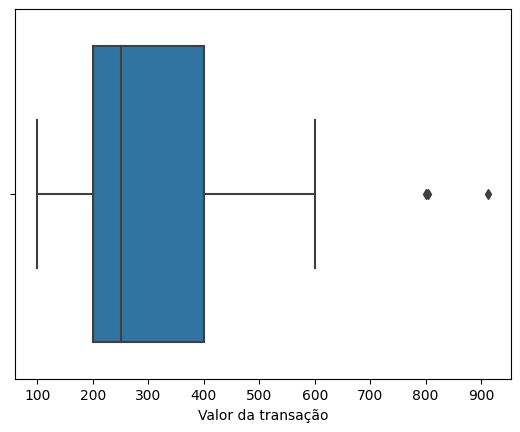

In [52]:
sns.boxplot(x=df['Valor da transação'])

In [53]:
df['Valor da transação']

0     100
1     200
2     150
3     500
4     300
5     913
6     250
7     400
8     200
9     150
10    200
11    200
12    400
13    300
14    150
15    301
16    805
17    300
18    400
19    250
20    150
21    100
22    500
23    600
24    200
25    350
26    100
27    250
28    800
29    250
Name: Valor da transação, dtype: int64

In [55]:
Q1 = df['Valor da transação'].quantile(.25)
Q3 = df['Valor da transação'].quantile(.75)
IQR = Q3 - Q1
lim_inf = Q1 - 1.5 * IQR
lim_sup = Q3 + 1.5 * IQR
outliers = (df['Valor da transação'] < lim_inf) | (df['Valor da transação']>lim_sup)

In [56]:
outliers

0     False
1     False
2     False
3     False
4     False
5      True
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16     True
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28     True
29    False
Name: Valor da transação, dtype: bool

In [57]:
df[outliers]

,ID da transação,Valor da transação,Data da transação,Local da transação
5,6,913,2022-01-06,"Nova Iorque, EUA"
16,17,805,2022-01-17,"Los Angeles, EUA"
28,29,800,2022-01-29,"Miami, EUA"


In [78]:
def calcula_outliers(column, DataFrame):
  Q1 = DataFrame[column].quantile(.25)
  Q3 = DataFrame[column].quantile(.75)
  IQR = Q3 - Q1
  lim_inf = Q1 - 1.5 * IQR
  lim_sup = Q3 + 1.5 * IQR

  outliers = DataFrame[(DataFrame[column] < lim_inf) | (DataFrame[column] > lim_sup)]

  return outliers

In [79]:
calcula_outliers('Valor da transação', df)

,ID da transação,Valor da transação,Data da transação,Local da transação
5,6,913,2022-01-06,"Nova Iorque, EUA"
16,17,805,2022-01-17,"Los Angeles, EUA"
28,29,800,2022-01-29,"Miami, EUA"
